<a href="https://colab.research.google.com/github/L3onD3v/From-EDA-to-ML/blob/master/PracticaDatosSeguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script 1: Configuración inicial y carga de datos

## **Este sería una bloque de texto**

In [ ]:
# Importamos las librerías necesarias
#Usamos pandas para manejar datos.
#matplotlib y seaborn para gráficos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo desde Google Drive
#Montamos Google Drive para acceder al archivo.
#from google.colab import drive
#drive.mount('/content/drive')

# Ruta del archivo (cambiar por la ruta correcta)
#ruta = '/content/drive/MyDrive/MachineLearning/DatosSeguros.csv'

# Leer el archivo CSV
df = pd.read_csv('DatosSeguros.csv')

# Mostrar las 5 primeras filas
#df.head()

df.tail()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1344,18,F,36.85,0,no,Cundinamarca,1629.8335
1345,19,F,27.90,0,yes,Caribe,16884.9240
1346,21,F,25.80,0,no,Caribe,2007.9450
1347,61,F,29.07,0,yes,Antioquia,29141.3603
1348,19,F,27.90,0,yes,Caribe,16884.9240


# Script 2: Información general del dataset

In [ ]:
# Revisar las dimensiones del dataset
#Revisamos cuántos datos tenemos.
print("Filas, columnas:", df.shape)

# Revisar los nombres de las columnas
print("Columnas:", df.columns.tolist())

# Verificar los tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Revisar el resumen estadístico de las variables numéricas
df.describe()

Filas, columnas: (1349, 7)
Columnas: ['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region', 'valor_seguro']

Tipos de datos:
edad              int64
sexo             object
imc             float64
hijos             int64
fumador          object
region           object
valor_seguro    float64
dtype: object


,edad,imc,hijos,valor_seguro
count,1349.000000,1347.000000,1349.000000,1349.000000
mean,39.109711,30.618682,1.092661,13311.523280
std,14.071136,6.120026,1.205027,12135.346316
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4751.070000
50%,39.000000,30.300000,1.000000,9411.005000
75%,51.000000,34.600000,2.000000,16884.924000
max,64.000000,53.130000,5.000000,63770.428010


# Script 3: Detección de valores nulos o duplicados

In [ ]:
# Encontrar valores nulos por columna
print("Valores nulos:")
print(df.isnull().sum())

# Encontrar valores duplicados
print("\nValores duplicados:", df.duplicated().sum())

# Eliminar duplicados (si hay)
df = df.drop_duplicates()
print("Filas después de eliminar duplicados:", df.shape)

Valores nulos:
edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

Valores duplicados: 12
Filas después de eliminar duplicados: (1337, 7)


# Script 4: Limpieza de datos (si es necesario)

In [ ]:
# Ejemplo: Si hubiera valores nulos en una columna numérica, los rellenamos con la media
# df['imc'] = df['imc'].fillna(df['imc'].mean())

# Verificar nuevamente valores nulos
print("Valores nulos después de limpieza:")
print(df.isnull().sum())

Valores nulos después de limpieza:
edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64


# Script 5: Análisis de variables categóricas

In [ ]:
#Usamos value_counts() para ver la distribución de categorías.
# Conteo de categorías en 'sexo'
print("Conteo por sexo:")
print(df['sexo'].value_counts())

# Conteo de categorías en 'fumador'
print("\nConteo por fumador:")
print(df['fumador'].value_counts())

# Conteo de categorías en 'region'
print("\nConteo por región:")
print(df['region'].value_counts())

Conteo por sexo:
sexo
M    675
F    662
Name: count, dtype: int64

Conteo por fumador:
fumador
no     1062
yes     273
Name: count, dtype: int64

Conteo por región:
region
Cundinamarca    364
Caribe          325
Antioquia       324
Boyaca          324
Name: count, dtype: int64


# Script 6: Visualización de variables categóricas

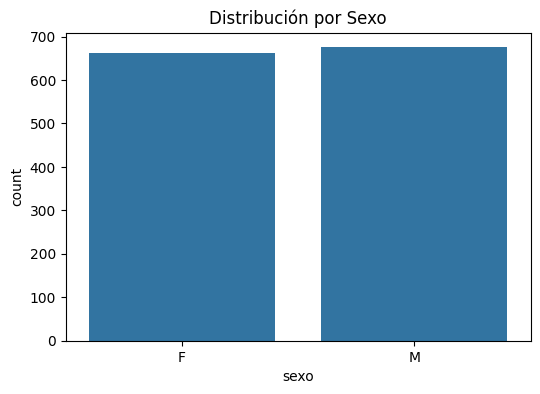

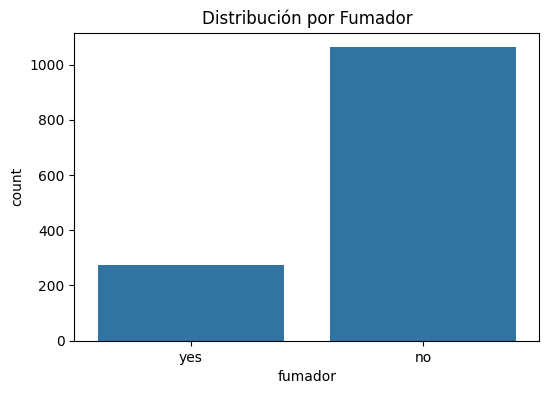

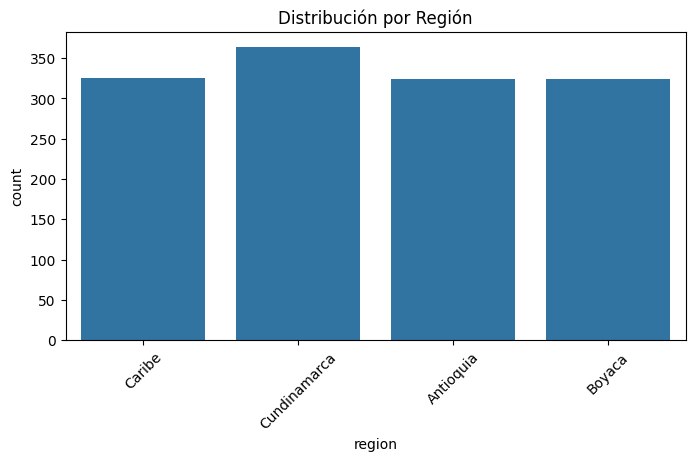

In [ ]:
#Usamos countplot de Seaborn para gráficos de barras.
# Gráfico de barras para 'sexo'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sexo')
plt.title('Distribución por Sexo')
plt.show()

# Gráfico de barras para 'fumador'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fumador')
plt.title('Distribución por Fumador')
plt.show()

# Gráfico de barras para 'region'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='region')
plt.title('Distribución por Región')
plt.xticks(rotation=45)
plt.show()

# Script 7: Análisis de variables numéricas

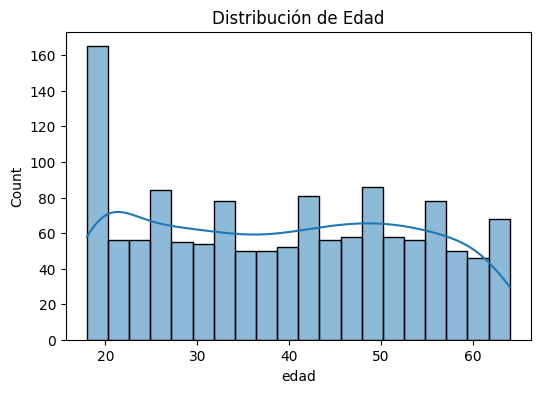

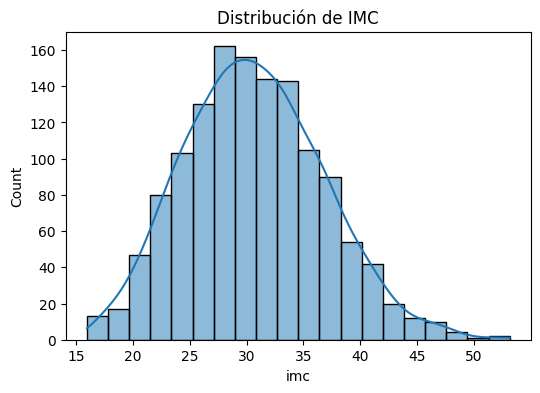

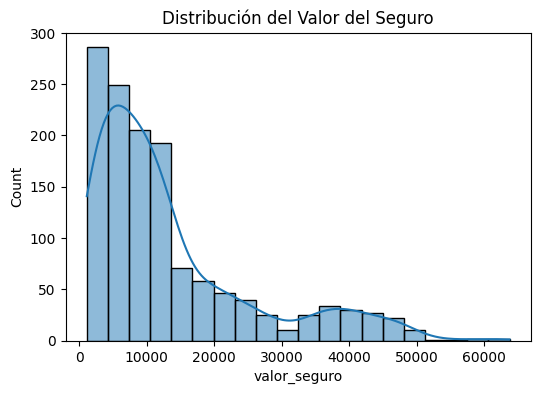

In [ ]:
#histplot muestra la distribución de una variable numérica.
#kde=True añade una línea de densidad.

# Histograma de la edad
plt.figure(figsize=(6,4))
sns.histplot(df['edad'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.show()

# Histograma del IMC
plt.figure(figsize=(6,4))
sns.histplot(df['imc'], bins=20, kde=True)
plt.title('Distribución de IMC')
plt.show()

# Histograma del valor del seguro
plt.figure(figsize=(6,4))
sns.histplot(df['valor_seguro'], bins=20, kde=True)
plt.title('Distribución del Valor del Seguro')
plt.show()

# Script 8: Relación entre variables

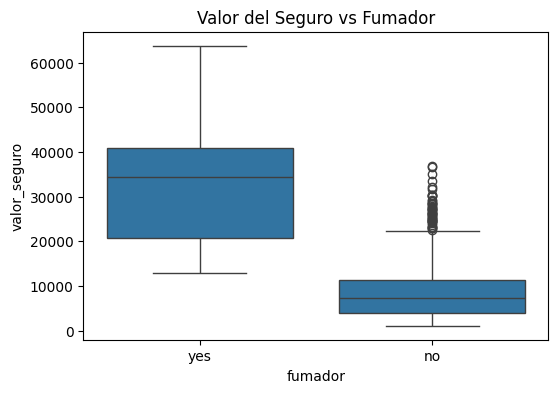

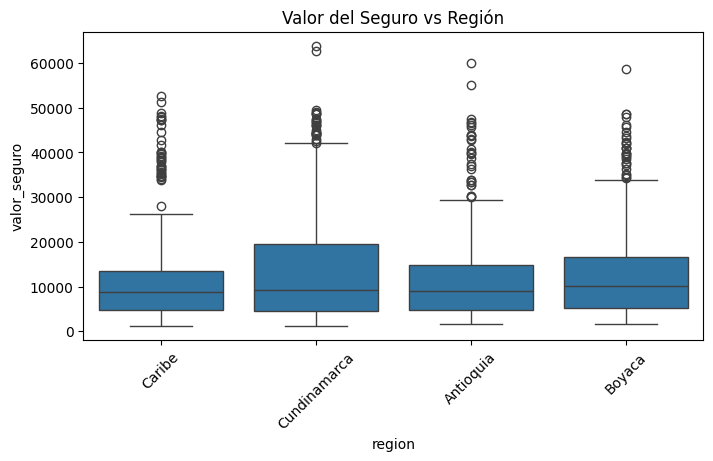

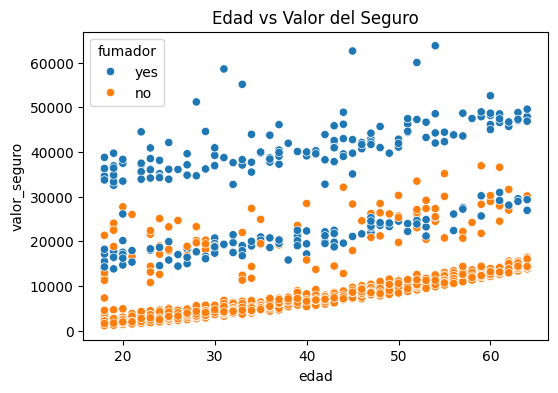

In [ ]:
#boxplot compara distribuciones entre categorías.

#scatterplot muestra relación entre dos variables numéricas.

# Boxplot: Valor del seguro por fumador
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='fumador', y='valor_seguro')
plt.title('Valor del Seguro vs Fumador')
plt.show()

# Boxplot: Valor del seguro por región
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='region', y='valor_seguro')
plt.title('Valor del Seguro vs Región')
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Edad vs Valor del seguro
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='edad', y='valor_seguro', hue='fumador')
plt.title('Edad vs Valor del Seguro')
plt.show()

# Script 9: Matriz de correlación

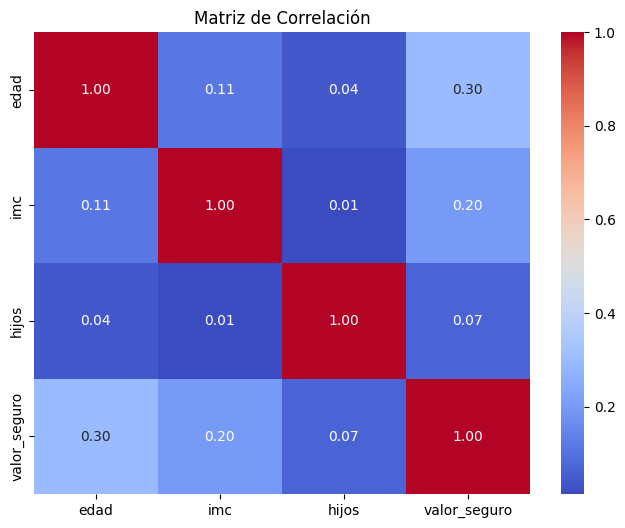

In [ ]:
#heatmap muestra correlaciones entre variables numéricas.
#Valores cercanos a 1 o -1 indican fuerte correlación.

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Script 10: Resumen y conclusiones

In [ ]:
# Resumen final
print("Resumen del Análisis Exploratorio:")
print("- Dataset limpio y listo para modelado.")
print("- Variables clave: edad, IMC, fumador, región influyen en el valor del seguro.")
print("- Fumadores tienden a tener seguros más costosos.")
print("- Edad y valor del seguro están correlacionados positivamente.")

Resumen del Análisis Exploratorio:
- Dataset limpio y listo para modelado.
- Variables clave: edad, IMC, fumador, región influyen en el valor del seguro.
- Fumadores tienden a tener seguros más costosos.
- Edad y valor del seguro están correlacionados positivamente.
